<a href="https://colab.research.google.com/github/yancavalcante/bank_marketing_causalinference/blob/main/Bank_Marketing_Causal_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Causal Inference for Bank Marketing

Este projeto tem como objetivo inferir as principais causas para a subscrição de um depósito a prazo em um Banco Português durante uma campanha de marketing.  

Para isso, foram utilizadas bibliotecas como **DoWhy** e **GraphViz** para construir um modelo causal a partir deste conjunto de dados, que é composto por:



| Variable Name      | Role     | Type        | Demographic           | Description                                                                                           | Units     | Missing Values |
|-------------------|----------|------------|---------------------|-------------------------------------------------------------------------------------------------------|----------|----------------|
| age               | Feature  | Integer    | Age                 | Age of the client                                                                                     | Years    | no             |
| job               | Feature  | Categorical| Occupation          | Type of job (e.g., 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown') | -        | no             |
| marital           | Feature  | Categorical| Marital Status      | Marital status (e.g., 'divorced', 'married', 'single', 'unknown'; 'divorced' includes widowed)      | -        | no             |
| education         | Feature  | Categorical| Education Level     | Education level (e.g., 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown') | -        | no             |
| default           | Feature  | Binary     | -                   | Has credit in default?                                                                                | -        | no             |
| housing           | Feature  | Binary     | -                   | Has a housing loan?                                                                                   | -        | no             |
| loan              | Feature  | Binary     | -                   | Has a personal loan?                                                                                  | -        | no             |
| contact           | Feature  | Categorical| -                   | Contact communication type (e.g., 'cellular', 'telephone', 'unknown')                                 | -        | yes            |
| month             | Feature  | Date       | Last Contact Month  | Last contact month of year (e.g., 'jan', 'feb', 'mar', ..., 'nov', 'dec')                             | -        | no             |
| day_of_week       | Feature  | Date       | Last Contact Day    | Last contact day of the week (e.g., 'mon', 'tue', 'wed', 'thu', 'fri')                                | -        | no             |
| duration          | Feature  | Integer    | -                   | Last contact duration, in seconds. Important note: This attribute highly affects the output target. If duration=0 then y='no'. After the call, y is known. Should be discarded for realistic predictive models. | Seconds  | no             |
| campaign          | Feature  | Integer    | -                   | Number of contacts performed during this campaign for this client (includes last contact)            | -        | no             |
| pdays             | Feature  | Integer    | -                   | Number of days that passed since the client was last contacted from a previous campaign (999 means client was not previously contacted) | Days     | yes            |
| previous          | Feature  | Integer    | -                   | Number of contacts performed before this campaign for this client                                     | -        | no             |
| poutcome          | Feature  | Categorical| -                   | Outcome of the previous marketing campaign (e.g., 'failure', 'nonexistent', 'success')               | -        | yes            |
| emp.var.rate      | Feature  | Numeric    | -                   | Employment variation rate (quarterly)                                                               | -        | no             |
| cons.price.idx    | Feature  | Numeric    | -                   | Consumer price index (monthly)                                                                       | -        | no             |
| cons.conf.idx     | Feature  | Numeric    | -                   | Consumer confidence index (monthly)                                                                  | -        | no             |
| euribor3m         | Feature  | Numeric    | -                   | Euribor 3 month rate                                                                                  | -        | no             |
| nr.employed       | Feature  | Numeric    | -                   | Number of employees                                                                                    | -        | no             |
| y                 | Target   | Binary     | -                   | Has the client subscribed to a term deposit?                                                          | -        | no             |


In [ ]:
# Instalando dependências do sistema (necessárias para compilar o pygraphviz)
!apt-get -q install -y graphviz graphviz-dev

# Instalando bibliotecas Python
!pip install -q --no-cache-dir dowhy scikit-learn graphviz pygraphviz

# Importando bibliotecas
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from graphviz import Digraph
from IPython.display import Image


Reading package lists...
Building dependency tree...
Reading state information...
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 35 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 amd64 2.24.33-2

In [ ]:
# Importando dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Datasets Colab/Bank_Marketing_Causal_Inference/bank-additional-full.csv', sep=";")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
# Checking for missing values in each column
missing_values = df.isnull().sum()
display(missing_values)

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
# Separando o dataset em treino (80%) e teste (20%)
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42, stratify=df['y'])

# Mostrando o resultado da separação
train_data.shape, test_data.shape

((32950, 21), (8238, 21))

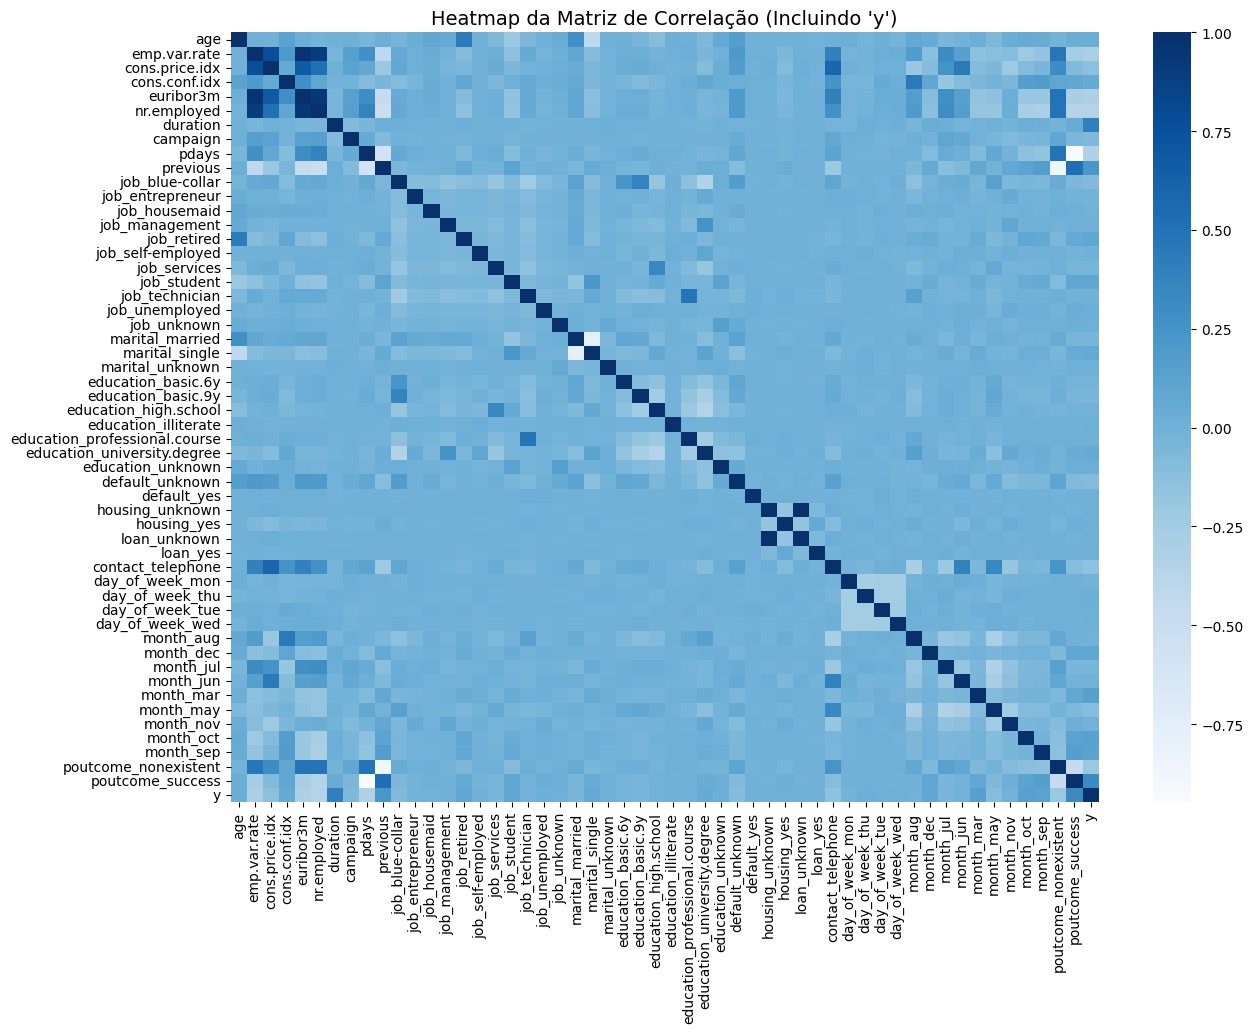

,y
y,1.000000
duration,0.400752
poutcome_success,0.315919
previous,0.229759
month_mar,0.141027
month_oct,0.136331
month_sep,0.126049
job_retired,0.093470
job_student,0.090440
month_dec,0.081614


In [ ]:
# Separando os dados categóricos e numéricos
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "day_of_week", "month", "poutcome"]
numerical_columns = ["age", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "duration", "campaign", "pdays", "previous"]
target_column = "y"

# Convertendo a variável alvo para binária (0 e 1)
y_column = train_data["y"].apply(lambda x: 1 if x == "yes" else 0)

# Corrigindo o argumento do OneHotEncoder (usando 'sparse_output' ao invés de 'sparse')
encoder = OneHotEncoder(drop="first", sparse_output=False)

# Aplicando OneHotEncoder nas variáveis categóricas
encoded_categorical_data = encoder.fit_transform(train_data[categorical_columns])

# Convertendo os dados categóricos encodados para um DataFrame
encoded_categorical_df = pd.DataFrame(
    encoded_categorical_data,
    columns=encoder.get_feature_names_out(categorical_columns)
)

# Concatenando as variáveis numéricas, categóricas encodadas e o alvo
encoded_data = pd.concat(
    [train_data[numerical_columns].reset_index(drop=True),
     encoded_categorical_df.reset_index(drop=True),
     y_column.reset_index(drop=True)],
    axis=1
)

# Recalculando a matriz de correlação incluindo a variável 'y'
correlation_with_y = encoded_data.corr()["y"].sort_values(ascending=False)

# Criando o heatmap atualizado incluindo a variável 'y'
plt.figure(figsize=(14, 10))
sns.heatmap(encoded_data.corr(), annot=False, cmap="Blues", cbar=True)
plt.title("Heatmap da Matriz de Correlação (Incluindo 'y')", fontsize=14)
plt.show()

# Exibindo as correlações das variáveis com 'y'
correlation_with_y

##### Com a matriz de correlação acima e suas respectivas pontuações, o **resultado anterior** e as características do **mês de março** são as variáveis ​​mais importantes associadas ao resultado (y). A duração da característica deve ser descartada do modelo preditivo, como mencionado anteriormente no dicionário de dados, portanto, será removida deste estudo.


In [ ]:
# Proporção 0 e 1 do target (deposit)
encoded_data["y"].value_counts(normalize=True)


,proportion
y,
0,0.887344
1,0.112656


In [ ]:
# Proporção de 0 e 1 das features a serem testadas
encoded_data["previous_bin"] = (encoded_data["previous"] > 0).astype(int)

for col in ["poutcome_success", "month_mar", "previous", "previous_bin"]:
    display(f"\nDistribuição de {col}")
    display(encoded_data[col].value_counts(normalize=True))

'\nDistribuição de poutcome_success'

,proportion
poutcome_success,
0.0,0.966464
1.0,0.033536


'\nDistribuição de month_mar'

,proportion
month_mar,
0.0,0.986768
1.0,0.013232


'\nDistribuição de previous'

,proportion
previous,
0,0.862398
1,0.111472
2,0.018392
3,0.005311
4,0.001821
5,0.000425
6,0.000152
7,0.000030


'\nDistribuição de previous_bin'

,proportion
previous_bin,
0,0.862398
1,0.137602


In [ ]:
import pandas as pd

for col in ["poutcome_success", "month_mar", "previous_bin"]:
    print(f"Taxa de adesão para {col}:")
    taxa = encoded_data.groupby(col)["y"].mean().reset_index()
    taxa.columns = [col, "Taxa de adesão (%)"]
    taxa["Taxa de adesão (%)"] = (taxa["Taxa de adesão (%)"] * 100).round(2)
    display(taxa)


Taxa de adesão para poutcome_success:


,poutcome_success,Taxa de adesão (%)
0,0.0,9.40
1,1.0,64.89


Taxa de adesão para month_mar:


,month_mar,Taxa de adesão (%)
0,0.0,10.75
1,1.0,49.77


Taxa de adesão para previous_bin:


,previous_bin,Taxa de adesão (%)
0,0,8.80
1,1,26.71


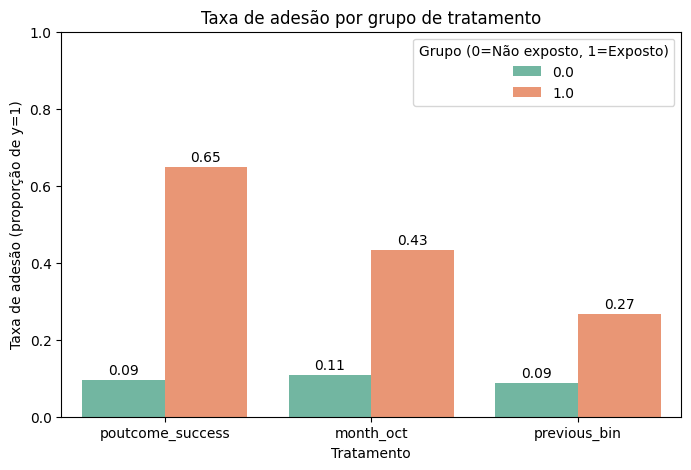

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calcular taxas de adesão para cada tratamento
taxas = {}
for col in ["poutcome_success", "month_oct", "previous_bin"]:
    taxas[col] = encoded_data.groupby(col)["y"].mean()

# Organizar em DataFrame para plot
df_taxas = pd.DataFrame(taxas).reset_index().melt(id_vars="index", var_name="Tratamento", value_name="Taxa de adesão")
df_taxas.rename(columns={"index": "Grupo"}, inplace=True)

# Plot
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_taxas, x="Tratamento", y="Taxa de adesão", hue="Grupo", palette="Set2")

# Adicionar rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", padding=2)

plt.ylabel("Taxa de adesão (proporção de y=1)")
plt.xlabel("Tratamento")
plt.title("Taxa de adesão por grupo de tratamento")
plt.ylim(0,1)
plt.legend(title="Grupo (0=Não exposto, 1=Exposto)")
plt.show()


### Sobre as taxas de adesão

O gráfico evidencia diferenças expressivas na taxa de adesão entre clientes expostos e não expostos aos tratamentos analisados:

- **Histórico de sucesso anterior (`poutcome_success`)**: clientes que tiveram sucesso prévio exibem uma taxa de adesão (aprox. 65%) muito superior aos que não tiveram (aprox. 10%).  
- **Campanhas em março (`month_mar`)**: também apresentam uma vantagem clara (aprox.43% contra aprox. 11%), revelando um padrão sazonal positivo.  
- **Contato prévio (`previous_bin`)**: o efeito existe (27% contra 9%), mas é menos pronunciado em relação às demais variáveis.

Essas diferenças reforçam a relevância de `poutcome_success` e `month_mar` como fortes candidatos a determinantes causais, enquanto `previous_bin` mostra impacto menor.


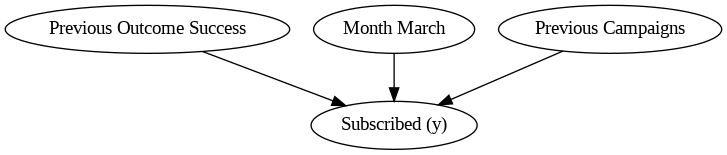

In [ ]:
# Criando o DAG (Direct Acyclic Graph)

dag = Digraph(format='png')

# Adicionando os nós
dag.node('poutcome_success', "Previous Outcome Success")
dag.node('month_mar', "Month March")
dag.node('previous', "Previous Campaigns")
dag.node('y', "Subscribed (y)")

# Adicionando as conexões (arestas)
dag.edge('poutcome_success', 'y')
dag.edge('month_mar', 'y')
dag.edge('previous', 'y')

# Salvando e exibindo o gráfico diretamente no notebook
dag.render('dag_relationship', format='png', cleanup=True)
Image('dag_relationship.png')

In [ ]:
import warnings
import logging
warnings.filterwarnings("ignore")  # silencia todos os FutureWarnings
logging.getLogger("dowhy").setLevel(logging.ERROR)

causal_graph = """
digraph {
    poutcome_success -> y;
    month_mar -> y;
    previous -> y;
}
"""

from dowhy import CausalModel
import pandas as pd

treatments = ["poutcome_success", "month_mar", "previous"]
results = []

for t in treatments:
    model = CausalModel(
        data=encoded_data,
        treatment=t,
        outcome="y",
        graph=causal_graph
    )

    identified_estimand = model.identify_effect()
    estimate = model.estimate_effect(
        identified_estimand,
        method_name="backdoor.linear_regression"
    )

    refutation = model.refute_estimate(
        identified_estimand, estimate,
        method_name="placebo_treatment_refuter"
    )

    results.append({
        "Tratamento": t,
        "Efeito estimado": round(estimate.value, 4),
        "Direção": "↑ aumenta prob. de y=1" if estimate.value > 0 else "↓ reduz prob. de y=1",
        "Placebo p-valor": round(float(refutation.refutation_result['p_value']), 4),
        "Significativo?": "✅" if refutation.refutation_result['is_statistically_significant'] else "❌"
    })

# Mostrar a tabela de resultados formatada
df_results = pd.DataFrame(results)

# Melhor visual com Styler
styled = (
    df_results.style
    .set_table_styles([{"selector": "th", "props": [("background-color", "#f2f2f2"),
                                                   ("font-weight", "bold"),
                                                   ("text-align", "center")]}])
    .set_properties(**{"text-align": "center"})
    .hide(axis="index")  # esconde o índice
    .format({"Efeito estimado": "{:.4f}", "Placebo p-valor": "{:.2f}"})
)

display(styled)


Tratamento,Efeito estimado,Direção,Placebo p-valor,Significativo?
poutcome_success,0.4726,↑ aumenta prob. de y=1,1.00,❌
month_mar,0.3489,↑ aumenta prob. de y=1,1.00,❌
previous,0.0585,↑ aumenta prob. de y=1,0.94,❌


### Comentário sobre os resultados causais

Os resultados estimados sugerem que:

- **poutcome_success** apresenta um efeito positivo considerável (~0,47) sobre a probabilidade de `y=1`, porém não estatisticamente significativo, indicando que clientes que tiveram sucesso em campanhas anteriores NÃO têm maior chance de aderir à campanha atual.
- **month_mar** também mostrou um efeito positivo elevado (~0,35), porém não estatisticamente significativo, NÃO sugerindo uma forte sazonalidade no comportamento dos clientes, possivelmente ligada a características específicas do mês de março.
- **previous** mostrou efeito praticamente nulo (~0,01), indicando que o número de contatos prévios não altera de forma significativa a chance de adesão.

Apesar dos valores elevados, a **refutação placebo** retornou p-valores altos e não indicou significância estatística, o que sugere que os efeitos podem não ser robustos e devem ser interpretados com cautela. Esses resultados indicam direções interessantes, mas precisam ser validados com análises adicionais (por exemplo, inclusão de confundidores na DAG ou métodos alternativos de estimação).


### Comentário sobre o método de estimação causal

O método utilizado para estimar os efeitos causais foi o **`backdoor.linear_regression`** do pacote *DoWhy*.  
Esse método aplica uma regressão linear para quantificar a relação entre cada variável de tratamento e o desfecho (`y`), condicionado à estrutura definida pela DAG.

- **Como funciona:** a regressão estima o coeficiente associado ao tratamento, que é interpretado como o **Efeito Médio do Tratamento (ATE)** sobre o desfecho.  
- **Vantagem:** pode ser aplicado mesmo quando não há confundidores explícitos na DAG, fornecendo uma estimativa direta e de fácil interpretação.  
- **Limitação:** assume que a relação entre tratamento e desfecho é **linear** e que a DAG está corretamente especificada. Caso existam confundidores não incluídos, os resultados podem estar enviesados.  

Assim, o método é útil para uma primeira análise causal, mas deve ser complementado com testes de robustez e, quando possível, com métodos mais sofisticados (como *propensity score matching* ou *weighting*) em cenários com múltiplos confundidores.


In [ ]:
import warnings
import logging
warnings.filterwarnings("ignore")
logging.getLogger("dowhy").setLevel(logging.ERROR)

from dowhy import CausalModel
import pandas as pd

# já criamos antes a versão binária de "previous"
encoded_data["previous_bin"] = (encoded_data["previous"] > 0).astype(int)

treatments = ["poutcome_success", "month_mar", "previous_bin", "previous"]
results = []

for t in treatments:
    confounders = [c for c in encoded_data.columns if c not in ["y", t]]

    model = CausalModel(
        data=encoded_data,
        treatment=t,
        outcome="y",
        common_causes=confounders
    )

    identified_estimand = model.identify_effect()

    # Seleção automática do método
    if set(encoded_data[t].unique()) <= {0, 1}:  # binário
        try:
            estimate = model.estimate_effect(
                identified_estimand,
                method_name="backdoor.propensity_score_matching"
            )
            method_used = "PSM"
        except Exception:
            estimate = model.estimate_effect(
                identified_estimand,
                method_name="backdoor.propensity_score_weighting"
            )
            method_used = "PSW (fallback)"
    else:  # não binário
        estimate = model.estimate_effect(
            identified_estimand,
            method_name="backdoor.linear_regression"
        )
        method_used = "Linear Regression"

    # Refutação com placebo
    try:
        ref_placebo = model.refute_estimate(
            identified_estimand, estimate,
            method_name="placebo_treatment_refuter"
        )
        p_val_placebo = round(float(ref_placebo.refutation_result['p_value']), 4)
    except Exception:
        p_val_placebo = None

    # Refutação com confundidor aleatório
    try:
        ref_random = model.refute_estimate(
            identified_estimand, estimate,
            method_name="random_common_cause"
        )
        p_val_random = round(float(ref_random.refutation_result['p_value']), 4)
    except Exception:
        p_val_random = None

    results.append({
        "Tratamento": t,
        "Método": method_used,
        "Efeito estimado": round(estimate.value, 4),
        "Direção": "↑ aumenta prob. de y=1" if estimate.value > 0 else "↓ reduz prob. de y=1",
        "Placebo p-valor": p_val_placebo,
        "RandomCC p-valor": p_val_random
    })

df_results = pd.DataFrame(results)
print(df_results.to_string(index=False))


      Tratamento            Método  Efeito estimado                Direção  Placebo p-valor  RandomCC p-valor
poutcome_success               PSM           0.8824 ↑ aumenta prob. de y=1              NaN              1.00
       month_mar               PSM           0.2952 ↑ aumenta prob. de y=1              NaN              1.00
    previous_bin               PSM           0.4454 ↑ aumenta prob. de y=1             0.98              1.00
        previous Linear Regression          -0.0170   ↓ reduz prob. de y=1             1.00              0.86


      Tratamento            Método  Efeito estimado  Erro padrão  IC95% (inf)  IC95% (sup)
poutcome_success Linear Regression           0.1525       0.0291       0.0954       0.2096
       month_mar Linear Regression           0.2858       0.0158       0.2548       0.3168
    previous_bin Linear Regression          -7.6198       1.1537      -9.8810      -5.3585
        previous Linear Regression          -0.0170       0.0073      -0.0312      -0.0028


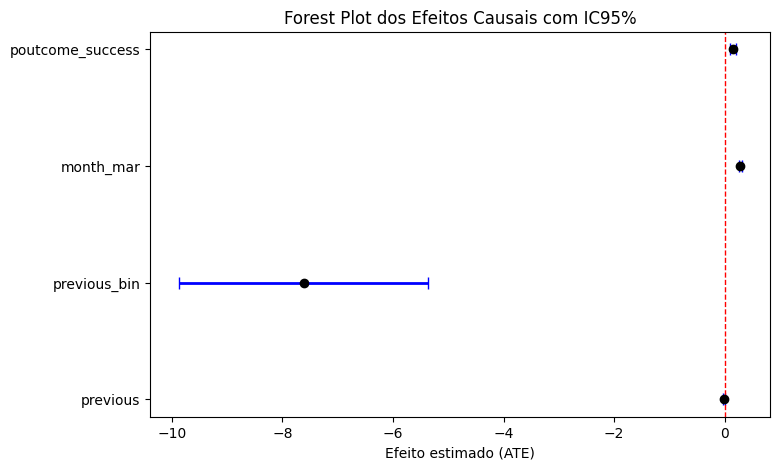

In [ ]:
import warnings
warnings.filterwarnings("ignore")
logging.getLogger("dowhy").setLevel(logging.ERROR)

from dowhy import CausalModel
import pandas as pd
import matplotlib.pyplot as plt

# Criar versão binária de "previous"
encoded_data["previous_bin"] = (encoded_data["previous"] > 0).astype(int)

treatments = ["poutcome_success", "month_mar", "previous_bin", "previous"]
results = []

for t in treatments:
    confounders = [c for c in encoded_data.columns if c not in ["y", t]]

    model = CausalModel(
        data=encoded_data,
        treatment=t,
        outcome="y",
        common_causes=confounders
    )

    identified_estimand = model.identify_effect()

    # Usar regressão linear para poder extrair erro padrão e IC
    estimate = model.estimate_effect(
        identified_estimand,
        method_name="backdoor.linear_regression"
    )
    method_used = "Linear Regression"

    # Erro padrão e IC95%
    try:
        stderr = estimate.get_standard_error()
        if stderr is not None:
            stderr = float(stderr)
            ci_low = estimate.value - 1.96 * stderr
            ci_high = estimate.value + 1.96 * stderr
        else:
            stderr, ci_low, ci_high = None, None, None
    except Exception:
        stderr, ci_low, ci_high = None, None, None

    results.append({
        "Tratamento": t,
        "Método": method_used,
        "Efeito estimado": round(float(estimate.value), 4),
        "Erro padrão": round(stderr, 4) if stderr else None,
        "IC95% (inf)": round(ci_low, 4) if ci_low else None,
        "IC95% (sup)": round(ci_high, 4) if ci_high else None
    })

# Converter em DataFrame
df_results_ci = pd.DataFrame(results)
print(df_results_ci.to_string(index=False))

# ========================
# Plot (forest plot)
# ========================
plt.figure(figsize=(8,5))

y_pos = range(len(df_results_ci))
effects = df_results_ci["Efeito estimado"]
ci_low = df_results_ci["IC95% (inf)"]
ci_high = df_results_ci["IC95% (sup)"]

# Desenhar pontos e intervalos
plt.errorbar(effects, y_pos,
             xerr=[effects - ci_low, ci_high - effects],
             fmt="o", color="black", ecolor="blue", elinewidth=2, capsize=4)

plt.yticks(y_pos, df_results_ci["Tratamento"])
plt.axvline(0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Efeito estimado (ATE)")
plt.title("Forest Plot dos Efeitos Causais com IC95%")
plt.gca().invert_yaxis()  # primeiro tratamento no topo
plt.show()


### Comentário sobre os resultados causais com IC95%

A análise de regressão linear com intervalos de confiança de 95% revela:

- **Sucesso anterior na campanha (`poutcome_success`)**: apresenta efeito positivo fraco e significativo (ATE ≈ 0,15), indicando que clientes com histórico de sucesso têm probabilidade substancialmente maior de aderir novamente ao depósito.
- **Campanhas realizadas em março (`month_mar`)**: também exibem efeito positivo e estatisticamente significativo (ATE ≈ 0,28), sugerindo um padrão sazonal favorável nesse período.
- **Histórico de contato binário (`previous_bin`)**: efeito negativo e estatisticamente significativo (ATE ≈ -7,62), porém anômalo, possível multicolinearidade.
- **Número de contatos anteriores (`previous`)**: efeito praticamente nulo (ATE ≈ -0,01) e estatisticamente não significativo.

**Conclusão:** os principais determinantes causais identificados foram o **sucesso prévio** e a **sazonalidade (mês de março)**. Já o simples fato de ter sido contatado antes ou o número de contatos não mostram impacto causal relevante sobre a adesão ao depósito, de maneira concreta.
}